In [1]:
import pickle
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
def get_df():
    with open('n_gram.df', 'rb') as handle:
        df = pickle.load(handle)
    return df

df = get_df()

In [3]:
del df['node_id']; del df['thread_id']
df.head(2)

,kl,time_by_lasttime,time_diff
0,.TAUapplication:NWCHEM:F2C_IARG,0.001499,177.0
1,.TAUapplication:NWCHEM:F2C_GETARG,0.001504,134.0


In [4]:
# outliers
df[df['time_diff'] > 3e7]

,kl,time_by_lasttime,time_diff
39178,NWCHEM:TASK:ANA_TASK,0.045875,51455420.0
39179,.TAUapplication:NWCHEM:ANALYZ,0.045850,51456760.0
39271,.TAUapplication:TASK,0.044867,51512870.0
116080,NWCHEM,0.000405,54229727.0


In [5]:
def get_cmap(n):
    colors = "grcmybk"
    return colors[n]

In [6]:
# look at a portion of function calls

df = df[(df['time_diff'] > 5000) & (df['time_diff'] < 2*50000)]
print(len(df))

3765


In [7]:
k = 7 # of clusters

colmap = {}
for i in range(k):
    colmap[i+1]= get_cmap(i)
    
print(colmap)
    
x_max = max(df['time_by_lasttime'])
y_max = max(df['time_diff'])

{1: 'g', 2: 'r', 3: 'c', 4: 'm', 5: 'y', 6: 'b', 7: 'k'}


# Clustering: KMeans

In [8]:
df_input = df[['time_by_lasttime', 'time_diff']]
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_input)
labels = kmeans.predict(df_input)
centroids = kmeans.cluster_centers_
colors = map(lambda x: colmap[x+1], labels)
colors = [c for c in colors]

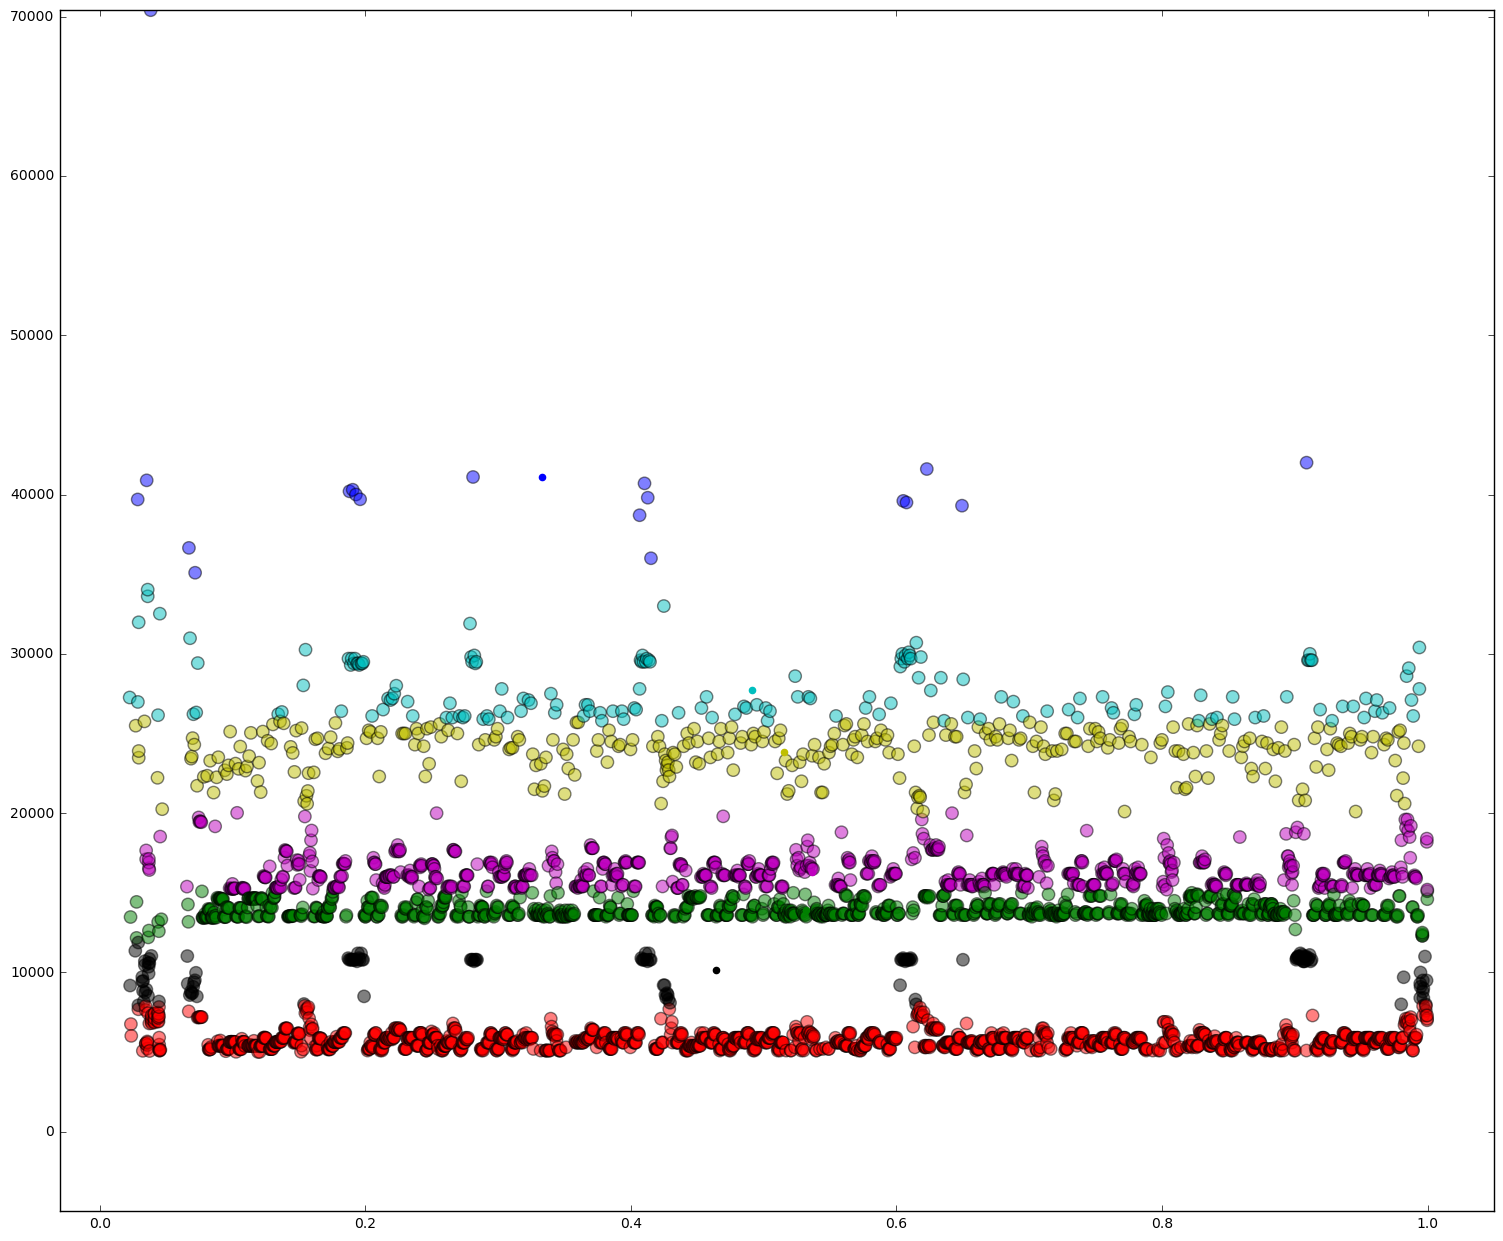

In [9]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 15.5)

plt.scatter(df_input['time_by_lasttime'], df_input['time_diff'], color=colors, alpha=0.5, edgecolor='k',s=20*4)

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
    
plt.xlim(-0.03, x_max+0.05)
plt.ylim(-5000, y_max)

plt.show()

# Study them by their running time ::

In [27]:
df['labels'] = labels
print(k)

7


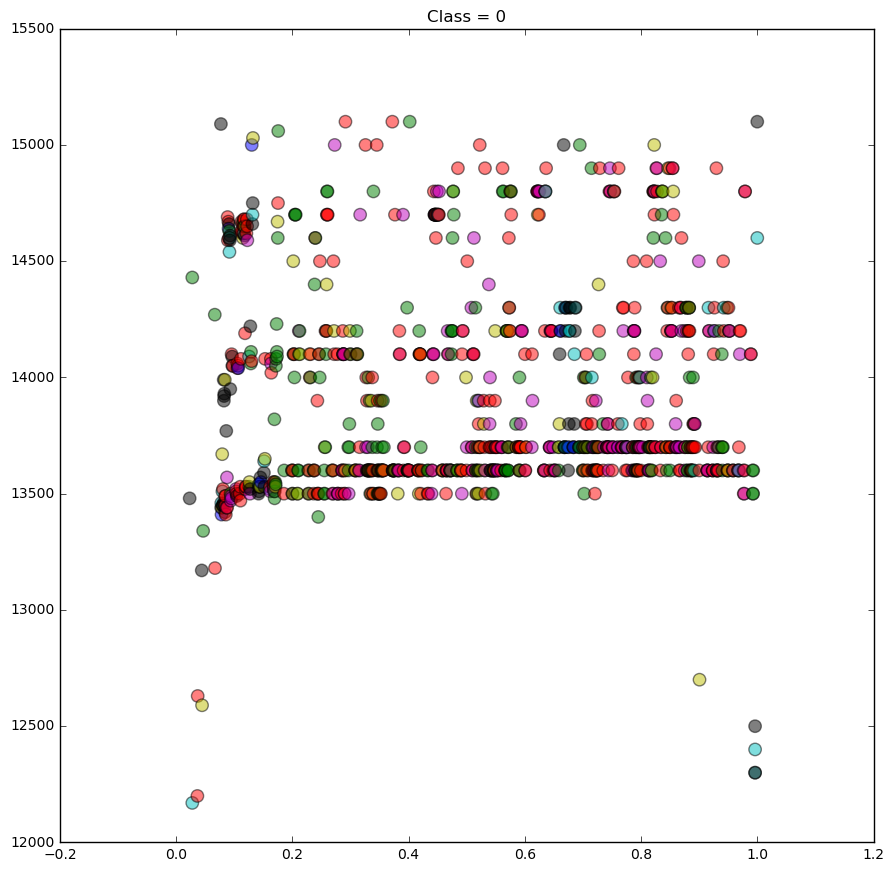

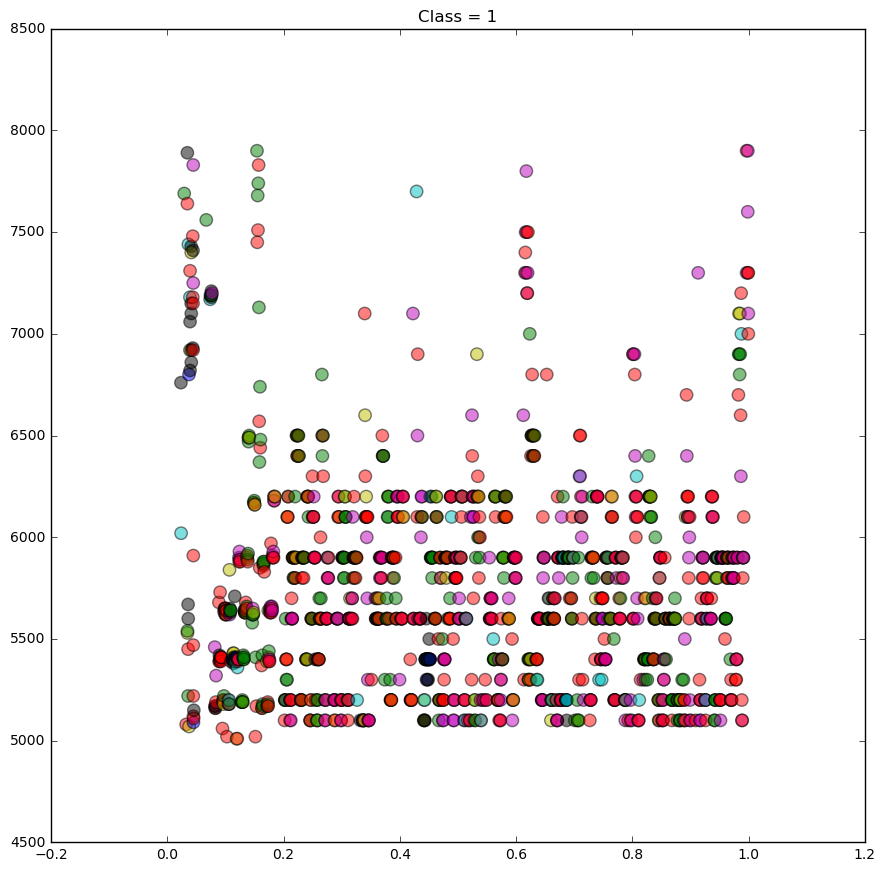

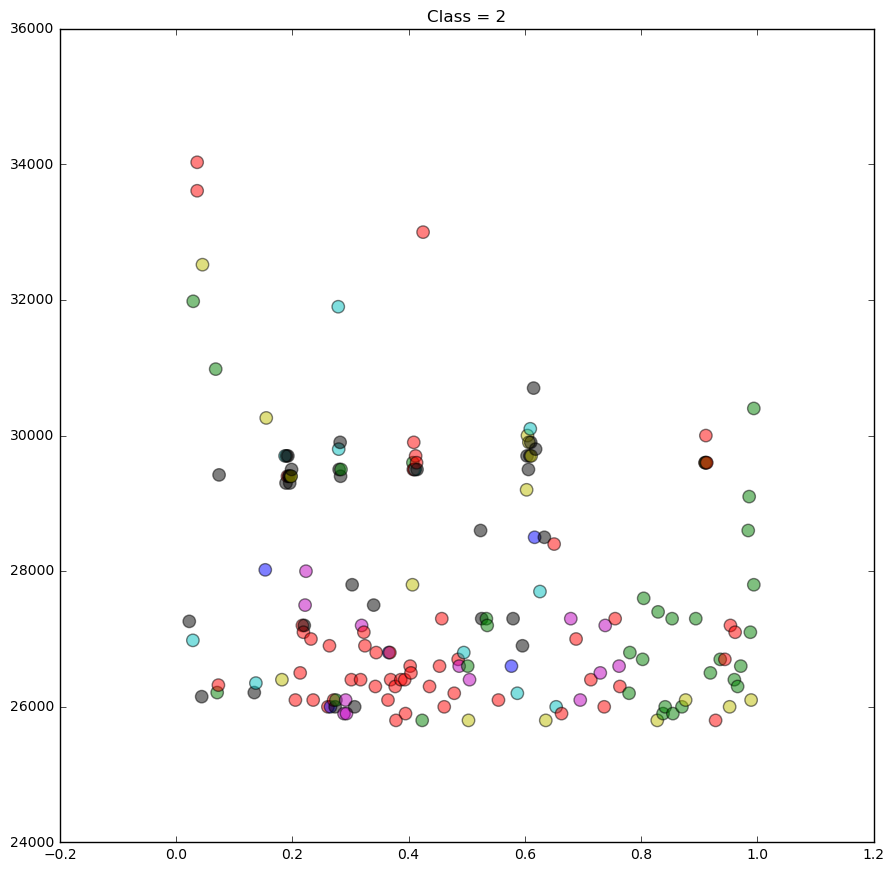

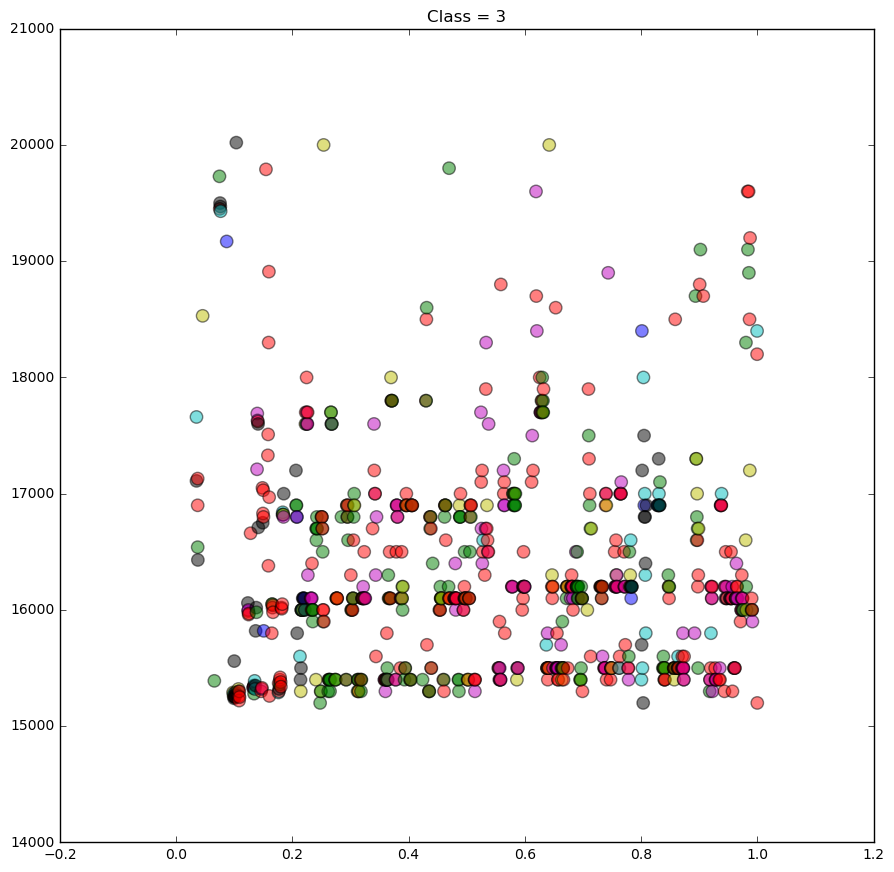

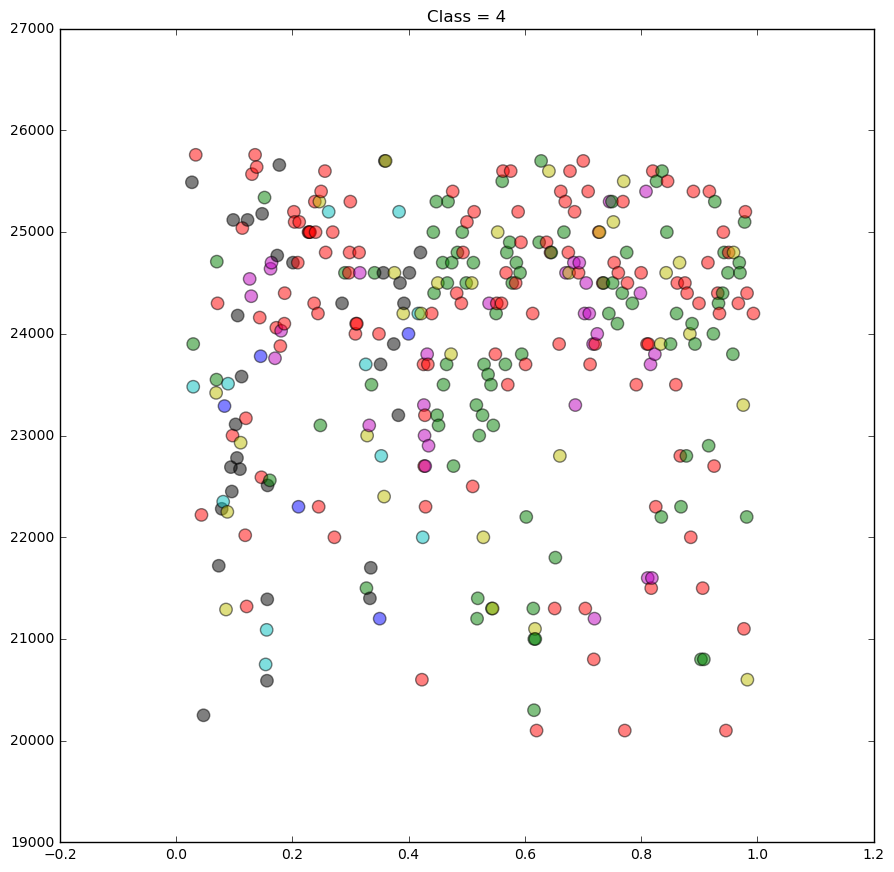

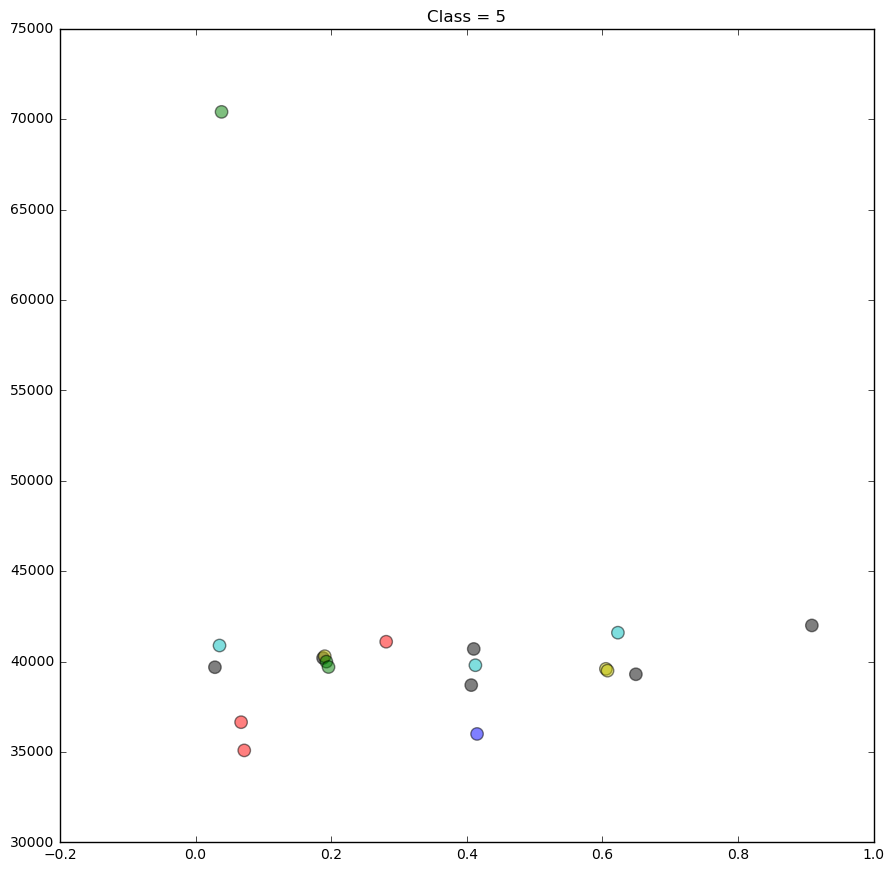

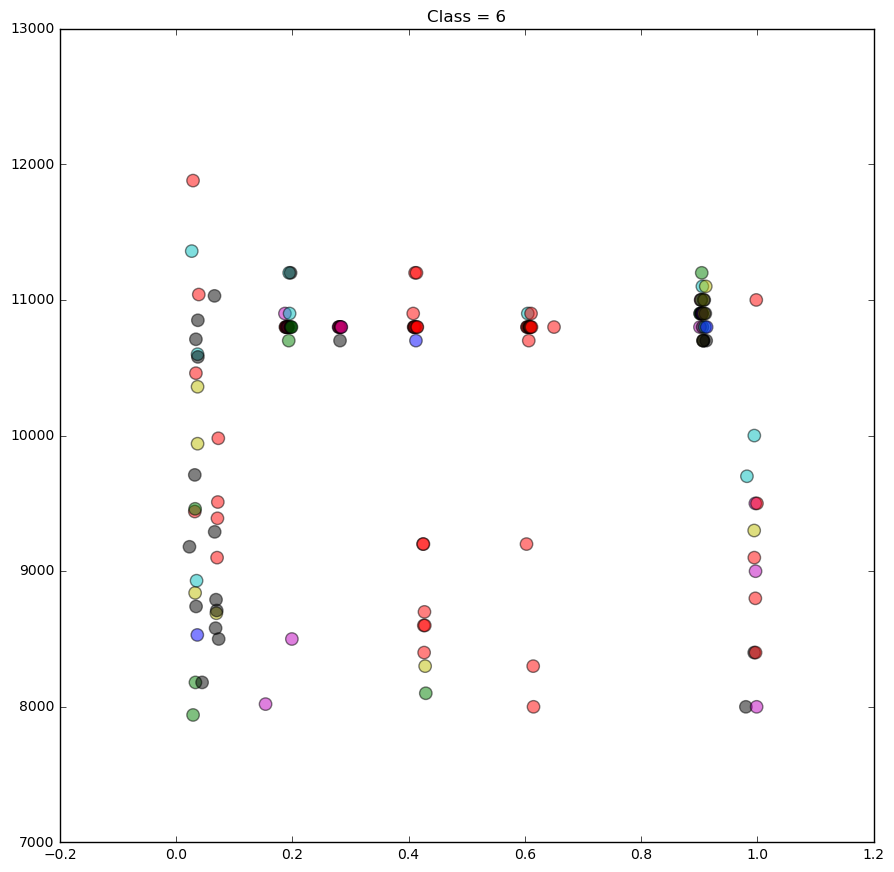

In [28]:
for l in range(k):
    df_1 = df[df['labels'] == l]
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(10.5, 10.5)
    plt.scatter(df_1['time_by_lasttime'], df_1['time_diff'], color=colors, alpha=0.5, edgecolor='k',s=20*4)
    plt.title('Class = ' + str(l))
    plt.show()